# `01` Experiment 1
- Design `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)

## `+` Import Libraries

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19, VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

keras.utils.set_random_seed(7)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## `+` Load & Preprocess CIFAR 10 Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


__Labels__

| Label | Description  |
|-------|-------------|
| 0     | airplane    |
| 1     | automobile  |
| 2     | bird        |
| 3     | cat         |
| 4     | deer        |
| 5     | dog         |
| 6     | frog        |
| 7     | horse       |
| 8     | ship        |
| 9     | truck       |


### Preview the Images

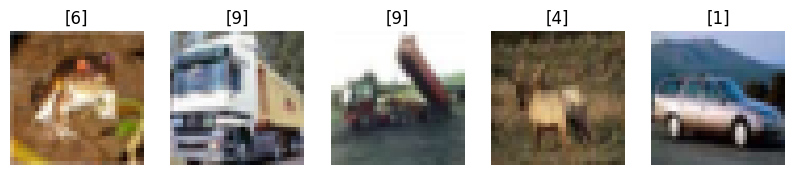

In [4]:
# plot first few images

def plot_images(data, labels, image_num=5):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, image_num, 1)
    for i in range(image_num):
        plt.subplot(1, image_num, i+1)
        plt.imshow(data[i])
        plt.title(labels[i])
        plt.axis('off')

    plt.show()

plot_images(X_train, y_train)

### Feature Rescaling

In [5]:
# Rescale Input
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

### OneHotEncode Target Variable

In [6]:
if y_train.shape != (len(y_train), 10):
    y_train = to_categorical(y_train, 10)
if y_test.shape != (len(y_test), 10):
    y_test  = to_categorical(y_test, 10)

print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of y_train: (50000, 10)
Shape of y_test: (10000, 10)


## `+` Set Global Parameters

In [7]:
# Hyperparameters
BATCH_SIZE  = 128
NUM_CLASSES = 10
EPOCHS      = 50

## `i` Trial no. 1

### Model Training

In [8]:
input = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), padding='same',activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same',activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(256, (3, 3), padding='same',activation='relu')(x)
x = Conv2D(256, (3, 3), padding='same',activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = keras.Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                             

In [9]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15, callbacks=[es], verbose=1)

Epoch 1/50
665/665 [==============================] - 28s 21ms/step - loss: 1.7778 - accuracy: 0.3318 - val_loss: 1.5509 - val_accuracy: 0.4287
Epoch 2/50
665/665 [==============================] - 13s 19ms/step - loss: 1.3351 - accuracy: 0.5108 - val_loss: 1.1763 - val_accuracy: 0.5805
Epoch 3/50
665/665 [==============================] - 13s 20ms/step - loss: 1.1018 - accuracy: 0.6050 - val_loss: 0.9545 - val_accuracy: 0.6581
Epoch 4/50
665/665 [==============================] - 13s 19ms/step - loss: 0.9726 - accuracy: 0.6544 - val_loss: 0.9569 - val_accuracy: 0.6616
Epoch 5/50
665/665 [==============================] - 13s 20ms/step - loss: 0.8656 - accuracy: 0.6935 - val_loss: 0.8182 - val_accuracy: 0.7093
Epoch 6/50
665/665 [==============================] - 13s 19ms/step - loss: 0.7934 - accuracy: 0.7214 - val_loss: 0.7482 - val_accuracy: 0.7409
Epoch 7/50
665/665 [==============================] - 13s 20ms/step - loss: 0.7352 - accuracy: 0.7420 - val_loss: 0.7919 - val_accuracy:

### Model Evaluation

In [10]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, preds))

313/313 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1000
           1       0.88      0.91      0.89      1000
           2       0.73      0.62      0.67      1000
           3       0.56      0.62      0.59      1000
           4       0.73      0.75      0.74      1000
           5       0.71      0.64      0.67      1000
           6       0.80      0.83      0.82      1000
           7       0.83      0.80      0.81      1000
           8       0.86      0.85      0.86      1000
           9       0.88      0.86      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



### Result Visualization

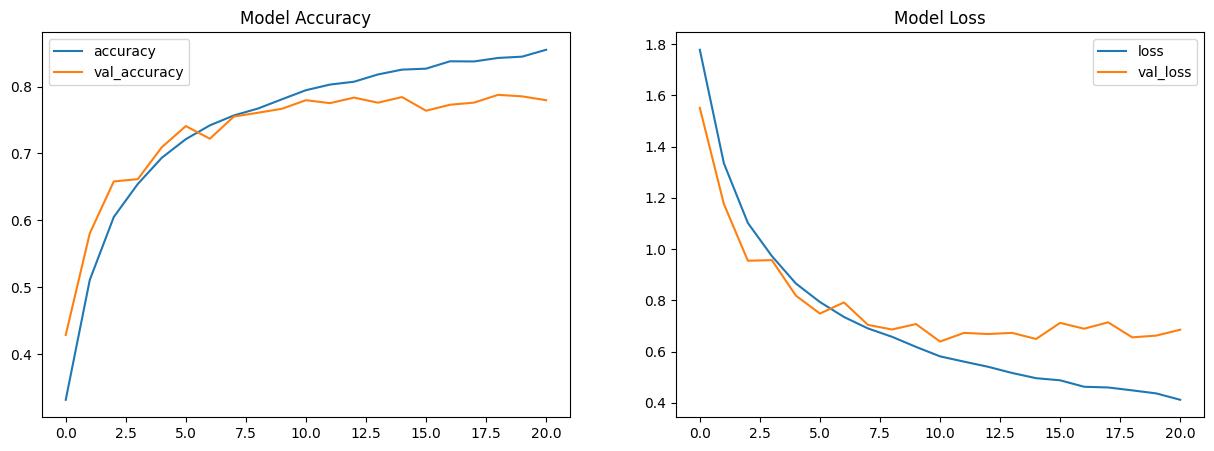

In [11]:
# Plot the training and validation accuracy and loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

## `ii` Trial no. 2

### Model Training

In [12]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape=(32, 32, 3)))
model_nn.add(Dense(256, activation='relu'))
model_nn.add(Dense(128, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(NUM_CLASSES, activation='softmax'))
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_nn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15, callbacks=[es], verbose=1)

Epoch 1/50
665/665 [==============================] - 4s 5ms/step - loss: 1.9127 - accuracy: 0.3082 - val_loss: 1.8518 - val_accuracy: 0.3213
Epoch 2/50
665/665 [==============================] - 4s 5ms/step - loss: 1.7249 - accuracy: 0.3820 - val_loss: 1.6770 - val_accuracy: 0.3919
Epoch 3/50
665/665 [==============================] - 4s 5ms/step - loss: 1.6316 - accuracy: 0.4166 - val_loss: 1.6432 - val_accuracy: 0.4095
Epoch 4/50
665/665 [==============================] - 3s 5ms/step - loss: 1.5833 - accuracy: 0.4344 - val_loss: 1.6066 - val_accuracy: 0.4240
Epoch 5/50
665/665 [==============================] - 4s 6ms/step - loss: 1.5380 - accuracy: 0.4512 - val_loss: 1.6114 - val_accuracy: 0.4289
Epoch 6/50
665/665 [==============================] - 3s 5ms/step - loss: 1.4993 - accuracy: 0.4652 - val_loss: 1.5611 - val_accuracy: 0.4445
Epoch 7/50
665/665 [==============================] - 4s 5ms/step - loss: 1.4752 - accuracy: 0.4758 - val_loss: 1.5147 - val_accuracy: 0.4575
Epoch 

### Model Evaluation

In [14]:
preds = model_nn.predict(X_test)
preds = np.argmax(preds, axis=1)
#y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, preds))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1000
           1       0.64      0.60      0.62      1000
           2       0.37      0.44      0.40      1000
           3       0.32      0.43      0.37      1000
           4       0.48      0.32      0.38      1000
           5       0.43      0.37      0.40      1000
           6       0.60      0.40      0.48      1000
           7       0.49      0.65      0.56      1000
           8       0.61      0.67      0.64      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



### Result Visualization

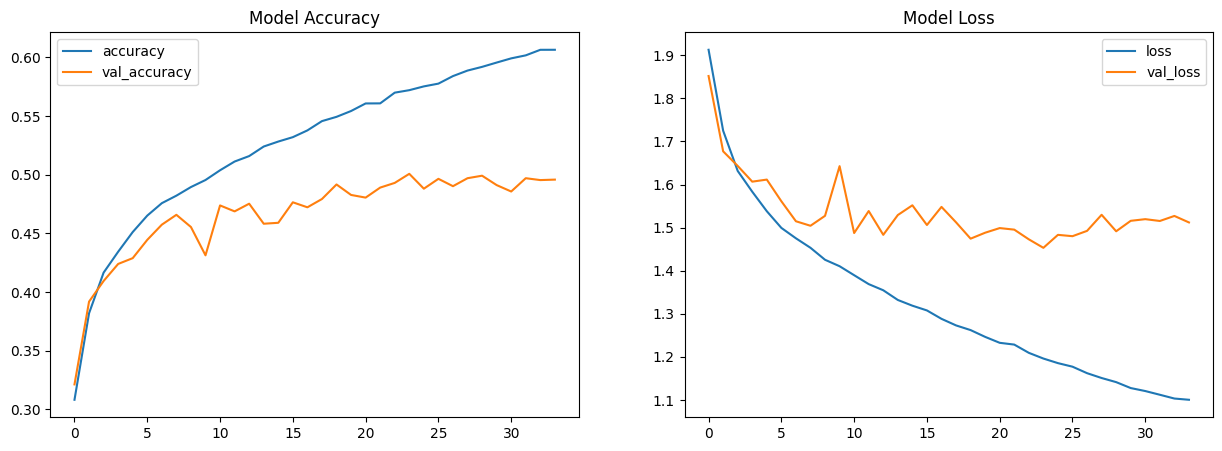

In [15]:
# Plot the training and validation accuracy and loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# Experiment 2: Transfer Learning
- Design `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.

To specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [8]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [9]:
model_vgg = Sequential()
for layer in vgg.layers[:-5]:
    model_vgg.add(layer)
    
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(64, activation='relu'))
model_vgg.add(Dense(NUM_CLASSES, activation='softmax'))
model_vgg.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [11]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
rop = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, min_lr=0.0001, verbose=1)
opt = Adam(learning_rate=0.001)
model_vgg.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history = model_vgg.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15, callbacks=[es, rop], verbose=1)

Epoch 1/50
333/333 [==============================] - 34s 84ms/step - loss: 1.9617 - accuracy: 0.2582 - val_loss: 1.6854 - val_accuracy: 0.3919 - lr: 0.0010
Epoch 2/50
333/333 [==============================] - 26s 78ms/step - loss: 1.2612 - accuracy: 0.5388 - val_loss: 1.2189 - val_accuracy: 0.5860 - lr: 0.0010
Epoch 3/50
333/333 [==============================] - 26s 78ms/step - loss: 0.9226 - accuracy: 0.6724 - val_loss: 0.8274 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 4/50
333/333 [==============================] - 26s 78ms/step - loss: 0.7316 - accuracy: 0.7472 - val_loss: 0.9301 - val_accuracy: 0.6932 - lr: 0.0010
Epoch 5/50
333/333 [==============================] - 26s 78ms/step - loss: 0.6043 - accuracy: 0.7938 - val_loss: 0.9230 - val_accuracy: 0.7040 - lr: 0.0010
Epoch 6/50
333/333 [==============================] - 26s 78ms/step - loss: 0.5168 - accuracy: 0.8245 - val_loss: 0.7078 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 7/50
333/333 [==============================] - 26s 

### Model Evaluation

In [12]:
preds = model_vgg.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, preds))

313/313 [==============================] - 4s 10ms/step
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1000
           1       0.88      0.92      0.90      1000
           2       0.74      0.71      0.72      1000
           3       0.62      0.65      0.63      1000
           4       0.73      0.80      0.76      1000
           5       0.87      0.55      0.67      1000
           6       0.83      0.83      0.83      1000
           7       0.86      0.83      0.85      1000
           8       0.77      0.93      0.84      1000
           9       0.88      0.84      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



### Result Visualization

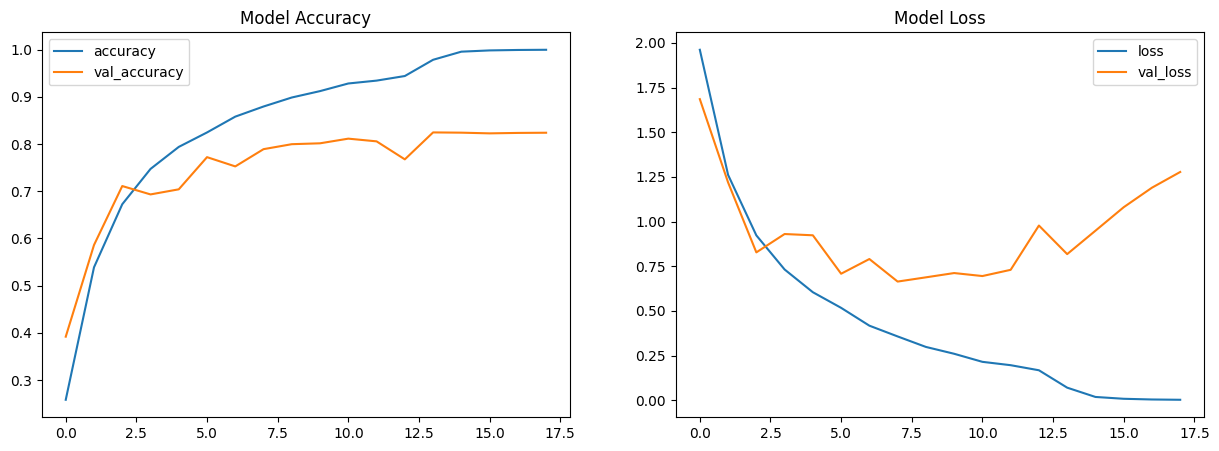

In [13]:
# Plot the training accuracy and loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

## `ii` Trial no. 2

### Model Training

In [8]:
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
#vgg19.trainable = False
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [11]:
model_vgg = Sequential()
for layer in vgg19.layers[:-5]:
    model_vgg.add(layer)
    
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(64, activation='relu'))
model_vgg.add(Dense(NUM_CLASSES, activation='softmax'))
model_vgg.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [12]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
rop = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=5, min_lr=0.0001, verbose=1)
opt = Adam(learning_rate=0.001)
model_vgg.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history = model_vgg.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.3, callbacks=[es, rop], verbose=1)

Epoch 1/50
274/274 [==============================] - 36s 113ms/step - loss: 2.2161 - accuracy: 0.1699 - val_loss: 1.9106 - val_accuracy: 0.2491 - lr: 0.0010
Epoch 2/50
274/274 [==============================] - 29s 106ms/step - loss: 1.6823 - accuracy: 0.3498 - val_loss: 1.5019 - val_accuracy: 0.4264 - lr: 0.0010
Epoch 3/50
274/274 [==============================] - 29s 107ms/step - loss: 1.3562 - accuracy: 0.4971 - val_loss: 1.1762 - val_accuracy: 0.5645 - lr: 0.0010
Epoch 4/50
274/274 [==============================] - 29s 107ms/step - loss: 1.0866 - accuracy: 0.6048 - val_loss: 1.0694 - val_accuracy: 0.6288 - lr: 0.0010
Epoch 5/50
274/274 [==============================] - 29s 106ms/step - loss: 0.9035 - accuracy: 0.6790 - val_loss: 0.8771 - val_accuracy: 0.6946 - lr: 0.0010
Epoch 6/50
274/274 [==============================] - 29s 106ms/step - loss: 0.7552 - accuracy: 0.7370 - val_loss: 0.8339 - val_accuracy: 0.7193 - lr: 0.0010
Epoch 7/50
274/274 [==============================] 

### Model Evaluation

In [14]:
preds = model_vgg.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, preds))

313/313 [==============================] - 5s 12ms/step
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.90      0.87      0.89      1000
           2       0.69      0.67      0.68      1000
           3       0.62      0.52      0.57      1000
           4       0.75      0.72      0.74      1000
           5       0.71      0.72      0.71      1000
           6       0.77      0.85      0.81      1000
           7       0.89      0.75      0.81      1000
           8       0.83      0.87      0.85      1000
           9       0.77      0.91      0.83      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



### Result Visualization

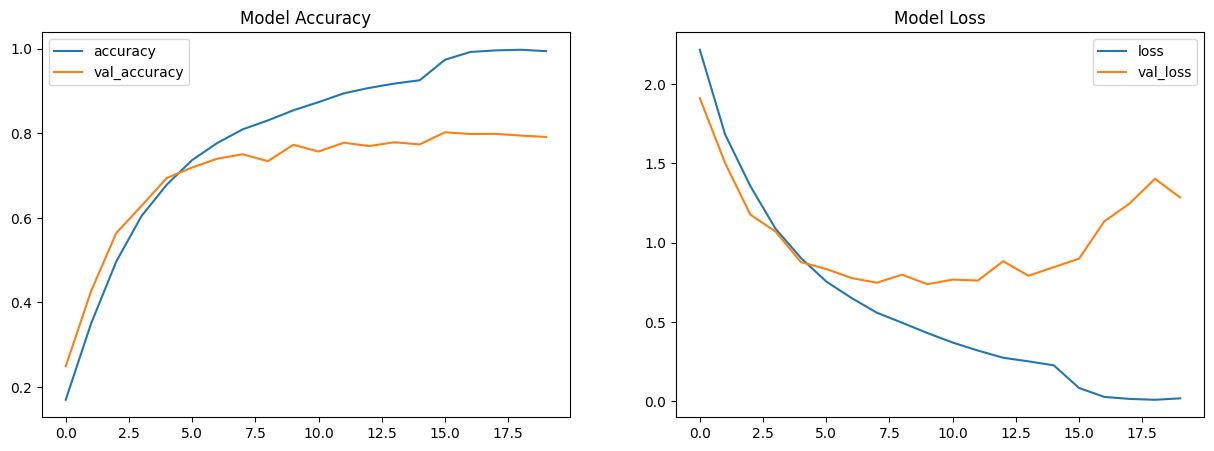

In [16]:
# Plot the training accuracy and loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

---

# `03` Experiment 03
- Repeat Assignment 1 and 2 using MNIST dataset but with no transfer learning this time

## `+` Load MNIST Dataset

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [27]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

### Preview the Images

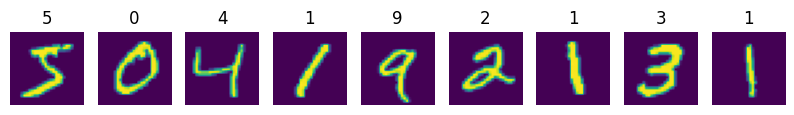

In [26]:
# plot first few images
plot_images(X_train, y_train, 9)


### Rescale Independent Features

In [28]:
# Rescale the Input
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 128
NUM_CLASSES = 10
EPOCHS      = 50

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [33]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape=(28, 28)))
model_nn.add(Dense(256, activation='relu'))
model_nn.add(Dense(128, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(NUM_CLASSES, activation='softmax'))
model_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_nn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15, callbacks=[es], verbose=1)

Epoch 1/50
399/399 [==============================] - 4s 9ms/step - loss: 0.2976 - accuracy: 0.9139 - val_loss: 0.1321 - val_accuracy: 0.9604
Epoch 2/50
399/399 [==============================] - 3s 7ms/step - loss: 0.1117 - accuracy: 0.9662 - val_loss: 0.0948 - val_accuracy: 0.9723
Epoch 3/50
399/399 [==============================] - 3s 8ms/step - loss: 0.0735 - accuracy: 0.9774 - val_loss: 0.0797 - val_accuracy: 0.9740
Epoch 4/50
399/399 [==============================] - 3s 7ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0812 - val_accuracy: 0.9761
Epoch 5/50
399/399 [==============================] - 2s 6ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0755 - val_accuracy: 0.9783
Epoch 6/50
399/399 [==============================] - 3s 7ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0818 - val_accuracy: 0.9780
Epoch 7/50
399/399 [==============================] - 3s 8ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0769 - val_accuracy: 0.9780
Epoch 

#### Model Ealuation

In [35]:
pred = model_nn.predict(X_test)
pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Result Visualization

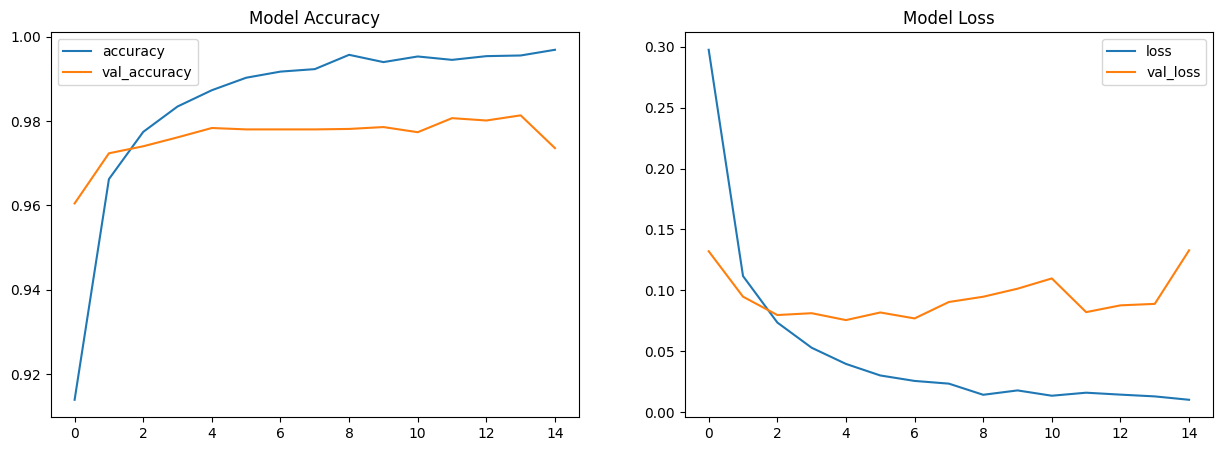

In [36]:
# Plot the training accuracy and loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

### Trial no. 2

#### Model Training

In [38]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape=(28, 28)))
model_nn.add(Dense(256, activation='relu'))
model_nn.add(Dense(128, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(NUM_CLASSES, activation='softmax'))
model_nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-tr

In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_nn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15, callbacks=[es], verbose=1)

Epoch 1/50
399/399 [==============================] - 4s 9ms/step - loss: 0.3351 - accuracy: 0.9029 - val_loss: 0.1353 - val_accuracy: 0.9596
Epoch 2/50
399/399 [==============================] - 3s 8ms/step - loss: 0.1178 - accuracy: 0.9651 - val_loss: 0.1037 - val_accuracy: 0.9686
Epoch 3/50
399/399 [==============================] - 3s 8ms/step - loss: 0.0798 - accuracy: 0.9754 - val_loss: 0.0837 - val_accuracy: 0.9739
Epoch 4/50
399/399 [==============================] - 3s 8ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 5/50
399/399 [==============================] - 3s 8ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0752 - val_accuracy: 0.9778
Epoch 6/50
399/399 [==============================] - 3s 8ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0888 - val_accuracy: 0.9767
Epoch 7/50
399/399 [==============================] - 3s 8ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0777 - val_accuracy: 0.9806
Epoch 

#### Model Evaluation

In [41]:
pred = model_nn.predict(X_test)
pred = np.argmax(pred, axis=1)
#y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, pred))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### Result Visualization

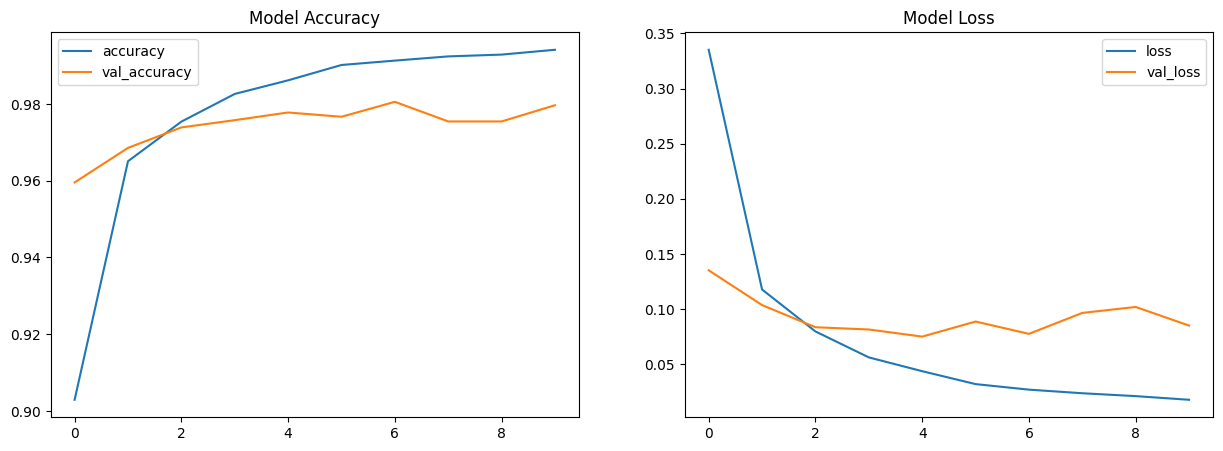

In [42]:
# Plot the training accuracy and loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [43]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [45]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(NUM_CLASSES, activation='softmax'))
model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_25 (Dense)            (None, 128)               1179776   
                                                      

In [46]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15, callbacks=[es], verbose=1)

Epoch 1/50
399/399 [==============================] - 7s 15ms/step - loss: 0.2051 - accuracy: 0.9374 - val_loss: 0.0565 - val_accuracy: 0.9839
Epoch 2/50
399/399 [==============================] - 6s 14ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 0.0411 - val_accuracy: 0.9874
Epoch 3/50
399/399 [==============================] - 6s 14ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 4/50
399/399 [==============================] - 6s 14ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0399 - val_accuracy: 0.9883
Epoch 5/50
399/399 [==============================] - 6s 15ms/step - loss: 0.0247 - accuracy: 0.9914 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 6/50
399/399 [==============================] - 6s 15ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0343 - val_accuracy: 0.9904
Epoch 7/50
399/399 [==============================] - 6s 15ms/step - loss: 0.0180 - accuracy: 0.9935 - val_loss: 0.0344 - val_accuracy: 0.9902

#### Model Evaluation

In [47]:
pred = model_cnn.predict(X_test)
pred = np.argmax(pred, axis=1)
#y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Result Visualization

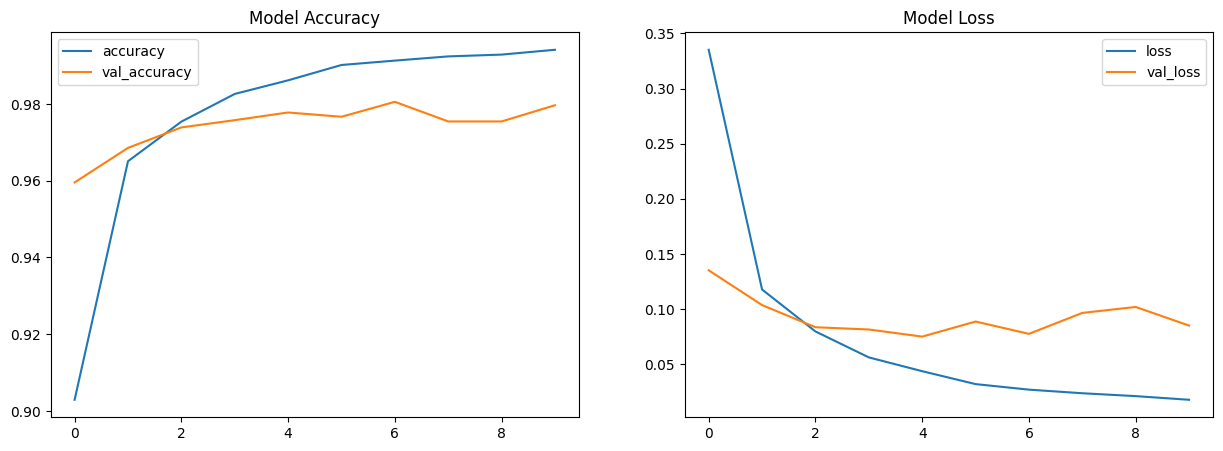

In [48]:
# Plot the training accuracy and loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

### Trial no. 2

#### Model Training

In [49]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(NUM_CLASSES, activation='softmax'))
model_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_27 (Dense)            (None, 128)               1179776   
                                                      

In [50]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.15, verbose=1)

Epoch 1/50
399/399 [==============================] - 7s 16ms/step - loss: 0.1978 - accuracy: 0.9400 - val_loss: 0.0643 - val_accuracy: 0.9829
Epoch 2/50
399/399 [==============================] - 6s 15ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0432 - val_accuracy: 0.9868
Epoch 3/50
399/399 [==============================] - 6s 15ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 4/50
399/399 [==============================] - 6s 15ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0366 - val_accuracy: 0.9894
Epoch 5/50
399/399 [==============================] - 6s 16ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0418 - val_accuracy: 0.9894
Epoch 6/50
399/399 [==============================] - 6s 15ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0363 - val_accuracy: 0.9903
Epoch 7/50
399/399 [==============================] - 6s 16ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0383 - val_accuracy: 0.9894

#### Model Evaluation

In [51]:
pred = model_cnn.predict(X_test)
pred = np.argmax(pred, axis=1)
#y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, pred))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Result Visualization

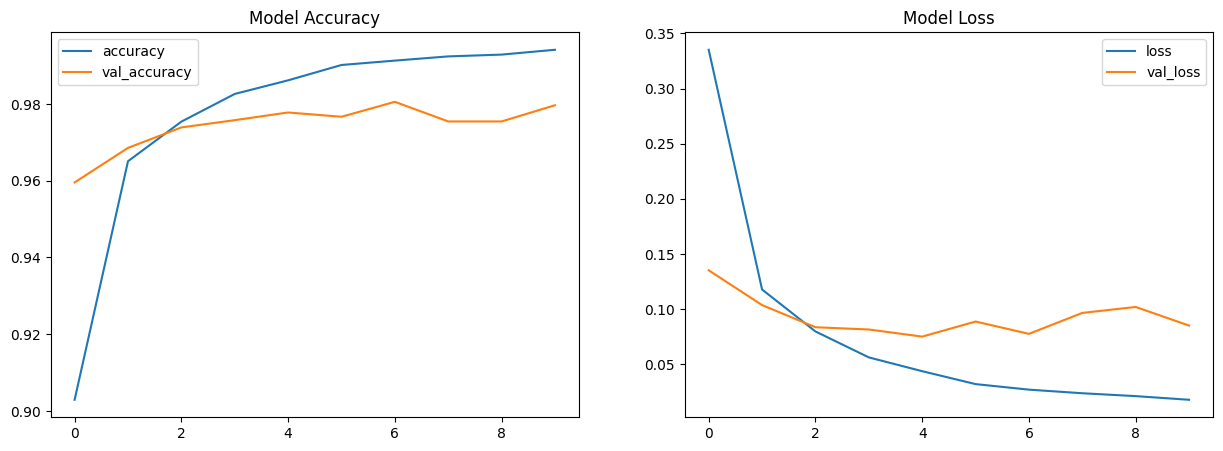

In [52]:
# Plot the training accuracy and loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()